In [67]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns 

from sklearn import linear_model
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


In [68]:
#Import Combined Cleaned Kaggle Data
df = pd.read_csv('Cleaned_Combined_Kaggle_Data.csv')
df.head()

,Age,Gender,Country,Formal_Education,Position,Years_Coding,Salary
0,23.0,Male,France,Master’s degree,Software Engineer,2.0,34999.5
1,42.0,Male,India,Professional degree,Software Engineer,0.0,6249.5
2,42.0,Male,Australia,Master’s degree,Other,2.0,274999.5
3,52.0,Male,France,Master’s degree,Data Scientist,20.0,64999.5
4,23.0,Male,India,Master’s degree,Data Scientist,5.0,12499.5


In [69]:
salary = df["Salary"]
def outlier_removal(df, salary):
    upper_limit = df["Salary"].mean() + 3 * df["Salary"].std()
    lower_limit = df["Salary"].mean() - 3 * df["Salary"].std()
    return upper_limit, lower_limit

upper_limit, lower_limit = outlier_removal(df, salary)
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  240260.90713476788
Lower Limit:  -125282.45747674946


In [70]:
df[(df["Salary"] < lower_limit) | (df["Salary"] > upper_limit)]

,Age,Gender,Country,Formal_Education,Position,Years_Coding,Salary
2,42.0,Male,Australia,Master’s degree,Other,2.0,274999.5
82,47.0,Male,Hong Kong (S.A.R.),Professional degree,Data Analyst,5.0,400000.0
166,42.0,Male,United Kingdom of Great Britain and Northern I...,Doctoral degree,Data Scientist,20.0,274999.5
215,64.5,Male,United States of America,Doctoral degree,Data Scientist,20.0,400000.0
240,23.0,Prefer not to say,Viet Nam,Bachelor’s degree,Data Scientist,2.0,400000.0
...,...,...,...,...,...,...,...
25757,52.0,Male,United States of America,Master’s degree,Product/Project Manager,2.0,274999.5
25811,47.0,Male,United States of America,Some college/university study without earning ...,Other,20.0,400000.0
25863,32.0,Male,United States of America,Master’s degree,Software Engineer,10.0,274999.5
25944,64.5,Male,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,Other,0.0,274999.5


In [71]:
df = df[(df["Salary"] > lower_limit) & (df["Salary"] < upper_limit)]
df

,Age,Gender,Country,Formal_Education,Position,Years_Coding,Salary
0,23.0,Male,France,Master’s degree,Software Engineer,2.0,34999.5
1,42.0,Male,India,Professional degree,Software Engineer,0.0,6249.5
3,52.0,Male,France,Master’s degree,Data Scientist,20.0,64999.5
4,23.0,Male,India,Master’s degree,Data Scientist,5.0,12499.5
5,23.0,Female,United States of America,Bachelor’s degree,Data Scientist,5.0,84999.5
...,...,...,...,...,...,...,...
26166,64.5,Male,Italy,Some college/university study without earning ...,Machine Learning Engineer,20.0,64999.5
26167,23.0,Male,Indonesia,Bachelor’s degree,Data Scientist,2.0,12499.5
26168,27.0,Male,Brazil,Master’s degree,Research Scientist,10.0,8749.5
26169,37.0,Male,Malaysia,I prefer not to answer,Machine Learning Engineer,2.0,2499.5


In [72]:
new_df = df[['Age','Gender','Years_Coding','Formal_Education','Salary']]
new_df

,Age,Gender,Years_Coding,Formal_Education,Salary
0,23.0,Male,2.0,Master’s degree,34999.5
1,42.0,Male,0.0,Professional degree,6249.5
3,52.0,Male,20.0,Master’s degree,64999.5
4,23.0,Male,5.0,Master’s degree,12499.5
5,23.0,Female,5.0,Bachelor’s degree,84999.5
...,...,...,...,...,...
26166,64.5,Male,20.0,Some college/university study without earning ...,64999.5
26167,23.0,Male,2.0,Bachelor’s degree,12499.5
26168,27.0,Male,10.0,Master’s degree,8749.5
26169,37.0,Male,2.0,I prefer not to answer,2499.5


In [73]:
from sklearn.preprocessing import OrdinalEncoder 

In [74]:
encoder = OrdinalEncoder()

In [75]:
cats_education = [['I prefer not to answer',0],
       ['No formal education past high school',1],
       ['Some college/university study without earning a bachelors degree',2],
       ['Professional degree',3],
       ['Bachelors degree',4],
       ['Masters degree',5],
       ['Doctoral degree',6]]

In [76]:
encoded_cats_education = encoder.fit_transform(new_df[['Formal_Education']])

In [77]:
encoded_df_education = new_df.copy()

In [78]:
encoded_df_education['Formal_Education']=encoded_cats_education
encoded_df_education

,Age,Gender,Years_Coding,Formal_Education,Salary
0,23.0,Male,2.0,3.0,34999.5
1,42.0,Male,0.0,5.0,6249.5
3,52.0,Male,20.0,3.0,64999.5
4,23.0,Male,5.0,3.0,12499.5
5,23.0,Female,5.0,0.0,84999.5
...,...,...,...,...,...
26166,64.5,Male,20.0,6.0,64999.5
26167,23.0,Male,2.0,0.0,12499.5
26168,27.0,Male,10.0,3.0,8749.5
26169,37.0,Male,2.0,2.0,2499.5


In [79]:
encoder = OrdinalEncoder()
gender = [['Male', 0],
          '[Female', 1]

In [80]:
encoded_gender = encoder.fit_transform(encoded_df_education[['Gender']])

In [81]:
encoded_df_education['Gender']=encoded_gender
encoded_df_education.head()

,Age,Gender,Years_Coding,Formal_Education,Salary
0,23.0,1.0,2.0,3.0,34999.5
1,42.0,1.0,0.0,5.0,6249.5
3,52.0,1.0,20.0,3.0,64999.5
4,23.0,1.0,5.0,3.0,12499.5
5,23.0,0.0,5.0,0.0,84999.5


In [82]:
Women_df = encoded_df_education[encoded_df_education['Gender'] == 1]
Women_df

,Age,Gender,Years_Coding,Formal_Education,Salary
0,23.0,1.0,2.0,3.0,34999.5
1,42.0,1.0,0.0,5.0,6249.5
3,52.0,1.0,20.0,3.0,64999.5
4,23.0,1.0,5.0,3.0,12499.5
6,32.0,1.0,10.0,3.0,2499.5
...,...,...,...,...,...
26166,64.5,1.0,20.0,6.0,64999.5
26167,23.0,1.0,2.0,0.0,12499.5
26168,27.0,1.0,10.0,3.0,8749.5
26169,37.0,1.0,2.0,2.0,2499.5


In [83]:
Men_df = encoded_df_education[encoded_df_education['Gender'] == 0]
Men_df

,Age,Gender,Years_Coding,Formal_Education,Salary
5,23.0,0.0,5.0,0.0,84999.5
9,52.0,0.0,20.0,3.0,137499.5
11,23.0,0.0,2.0,3.0,22499.5
19,32.0,0.0,10.0,3.0,174999.5
24,32.0,0.0,20.0,1.0,94999.5
...,...,...,...,...,...
26127,37.0,0.0,2.0,3.0,84999.5
26135,52.0,0.0,20.0,3.0,174999.5
26139,27.0,0.0,2.0,3.0,22499.5
26145,23.0,0.0,2.0,6.0,27499.5


In [84]:
Women_X = Women_df[['Age','Gender','Years_Coding','Formal_Education']]
Men_X = Men_df[['Age','Gender','Years_Coding','Formal_Education']]

Women_Y = Women_df['Salary']
Men_Y = Men_df['Salary']

In [85]:
from sklearn.model_selection import train_test_split
Women_X_train, Women_X_test, Women_y_train, Women_y_test = train_test_split(Women_X, Women_Y, test_size=0.25, random_state=101)
print(Women_X_train.shape)
print(Women_X_test.shape)
print(Women_y_train.shape)
print(Women_y_test.shape)

(16464, 4)
(5488, 4)
(16464,)
(5488,)


In [86]:
from sklearn.model_selection import train_test_split
Men_X_train, Men_X_test, Men_y_train, Men_y_test = train_test_split(Men_X, Men_Y, test_size=0.25, random_state=101)
print(Men_X_train.shape)
print(Men_X_test.shape)
print(Men_y_train.shape)
print(Men_y_test.shape)

(2615, 4)
(872, 4)
(2615,)
(872,)


In [87]:
from sklearn.linear_model import LinearRegression
Women_model = LinearRegression()
Women_model.fit(Women_X_train,Women_y_train)

LinearRegression()

In [88]:
from sklearn.linear_model import LinearRegression
Men_model = LinearRegression()
Men_model.fit(Men_X_train,Men_y_train)

LinearRegression()

In [89]:
# print the intercept
print(Women_model.intercept_)

1770.7851419671133


In [90]:
# print the intercept
print(Men_model.intercept_)

1227.275562024719


In [91]:
Women_coeff_parameter = pd.DataFrame(Women_model.coef_,Women_X.columns,columns=['Coefficient'])
Women_coeff_parameter

,Coefficient
Age,1003.493939
Gender,0.000000
Years_Coding,2114.140314
Formal_Education,313.648841


In [92]:
Men_coeff_parameter = pd.DataFrame(Men_model.coef_,Men_X.columns,columns=['Coefficient'])
Men_coeff_parameter

,Coefficient
Age,8.451418e+02
Gender,1.364242e-12
Years_Coding,2.495845e+03
Formal_Education,7.261634e+02


In [93]:
Women_predictions = Women_model.predict(Women_X_test)
Women_predictions

array([50411.70898689, 40376.76959486, 39435.82307104, ...,
       50006.52464164, 40376.76959486, 40376.76959486])

In [94]:
Men_predictions = Men_model.predict(Men_X_test)
Men_predictions

array([ 33989.66725971,  40751.03800891,  51183.04273459,  38703.81910479,
        49202.45638925,  38703.81910479,  59634.46111493,  31216.2849269 ,
        33989.66725971,  35441.99411707,  38703.81910479,  42929.52829495,
        35441.99411707,  80367.19918437,  41477.20143759,  36525.32881874,
        78914.87232701,  31216.2849269 ,  38703.81910479,  35323.25175265,
        55408.75192476,  22699.23085561,  58182.13425757,  38703.81910479,
        35124.63967715,  38703.81910479,  31216.2849269 ,  38703.81910479,
        25657.22728872,  28720.44020094,  47802.47538246,  29037.79464086,
        83140.58151718,  47155.23748512,  27835.71757477,  87366.29070735,
        51183.04273459,  58182.13425757,  42929.52829495,  41397.56777145,
        23161.38256276,  84592.90837454,  31216.2849269 ,  49730.71587723,
        57455.97082889,  58182.13425757,  31216.2849269 ,  31216.2849269 ,
        31216.2849269 ,  33144.76146661,  41477.20143759,  27835.71757477,
        41714.92221137,  

<AxesSubplot:xlabel='Salary'>

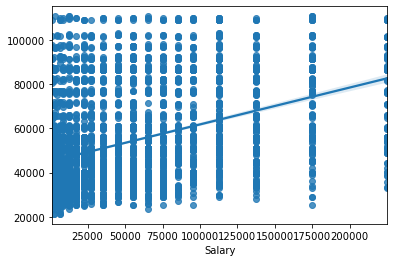

In [95]:
sns.regplot(Women_y_test,Women_predictions)